## Изучение и подготовка данных

In [1]:
import pandas as pd
import numpy as np

import time
from datetime import datetime
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import math
import seaborn as sns

sns.set(font_scale=1.2)

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)

In [2]:
sns.set_style("darkgrid", {"grid.color": "dimgray", "grid.linestyle": ":"})

In [3]:
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),
    pd.read_csv('orders_info_short.csv'),
    pd.read_csv('costs_info_short.csv')
)

### Данные о визитах

In [4]:
visits.info()
visits.sample(15, random_state=1).style.highlight_null(null_color='lightcoral')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


<font size=2>
При первом ознакомлении видим, что явных пропусков в данных нет, столбцы с датой и временем начала/окончания сессии как и все остальные, за исключением столбца <b>User Id</b> в текстовом виде. Помимо формата данных не лишним будут "причесать" названия столбцов, для удобства сделаем это сразу:

In [5]:
# old
#visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [6]:
# new
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]

<font size=2>
Преобразуем тип данных в столбцах <b>session_start</b> и <b>session_end</b>

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

<font size=2>
Столбцец <b>user_id</b> не трогаем, тип данных в нём числовой, а данные в оставшихся столбцах <b>region, device</b> и <b>channel</b> приведёт к строковому типу данных:

In [8]:
#visits['region'] = visits['region'].astype(str)
#visits['device'] = visits['device'].astype(str)
#visits['channel'] = visits['channel'].astype(str)

<font size=2>
Посмотрим на данные в разрезе по столбцам:

In [9]:
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
77538669605      1
275054308374     1
466896385517     1
397837182455     1
437337554992     1
Name: user_id, Length: 150008, dtype: int64

<font size=2>
На почти 310 тысяч записей уникальных пользователей у нас в два раза меньше - 150 тысяч, самый активный пользователь был на сайте 46 раз, наименее активные пользователи разумеется заходили всего лишь по разу.

In [10]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

<font size=2>
География пользователей у нас представлена 4 странами - США, Великобритания, Франция и Германия. На данные по пользователям из США приходится 2/3 данных.

In [11]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

<font size=2>
Категория устройств насчитывает 4 типа устройств: iPhone, по которому предствавлено больше всего данных, Android-устройства на втором месте и, можно сказать, что третье место между собой делят PC и Mac. Даже при беглом знакомстве с данными можно заметить, что пользователи предпочитают заходить в приложение с мобильных устройств гораздо чаще, чем с компьютеров.

In [12]:
visits['session_start'].value_counts()

2019-10-22 17:17:39    3
2019-07-12 11:43:00    3
2019-08-25 08:20:51    3
2019-10-01 09:35:59    3
2019-09-25 03:10:33    3
                      ..
2019-08-22 21:13:55    1
2019-09-11 18:50:45    1
2019-08-08 10:16:55    1
2019-10-02 16:13:37    1
2019-07-27 23:14:33    1
Name: session_start, Length: 306813, dtype: int64

In [13]:
visits['session_end'].value_counts()

2019-08-27 20:15:44    3
2019-09-23 20:37:13    3
2019-09-09 15:53:39    3
2019-07-05 03:22:47    3
2019-08-03 06:31:26    3
                      ..
2019-06-27 07:56:04    1
2019-10-03 21:29:41    1
2019-07-05 06:16:17    1
2019-06-09 07:51:07    1
2019-06-01 23:49:10    1
Name: session_end, Length: 306793, dtype: int64

In [14]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

<font size=2>
    Органических пользователей у нас примерно треть от общего числа, остальные пользователи от рекламных каналов. На них мы подробнее посмотрим при разборе таблицы <b>costs</b>.

In [15]:
visits.duplicated().sum()

0

<font size=2>
Уникальных записей о времени начала и окончания сессии немногим меньше, чем общее число записей, однако полных дублей у нас в таблице нет, как и пропусков, данные по всем пользовательским посещениям уникальные, переходим к ознакомлению с данными о заказах.

### Данные о заказах

In [16]:
orders.info()
orders.sample(15, random_state=1).style.highlight_null(null_color='lightcoral')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


<font size=2>
Как и для таблицы <b>visits</b>, проведём для исходных данных о заказах схожие манипуляции. В столбцах <b>user_id</b> и <b>revenue</b> тип данных не меняем, он соответствует представленным данным. 

In [17]:
# переименовываем столбцы
# old
#orders.columns = ['user_id', 'event_dt', 'revenue']

In [18]:
# new
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]

In [19]:
# переводим в формат даты 'event_dt'
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [20]:
# смотрим на данные в столбце 'user_id'
orders['user_id'].value_counts()

901180916748    22
883098437811    20
512471511263    19
75337957494     19
295795879965    19
                ..
389231879246     1
550744906785     1
314873470284     1
502292589695     1
775233404832     1
Name: user_id, Length: 8881, dtype: int64

In [21]:
# смотрим на данные в столбце 'user_id'
orders['event_dt'].value_counts()

2019-10-31 06:23:16    2
2019-10-25 16:24:24    2
2019-09-27 03:56:55    2
2019-06-22 16:45:48    2
2019-10-26 06:49:22    2
                      ..
2019-05-06 02:03:52    1
2019-10-09 07:23:47    1
2019-10-17 15:44:47    1
2019-08-29 23:48:59    1
2019-09-28 09:26:44    1
Name: event_dt, Length: 40163, dtype: int64

In [22]:
# смотрим на данные в столбце 'revenue'
orders['revenue'].describe()

count   40,212.00
mean         5.37
std          3.45
min          4.99
25%          4.99
50%          4.99
75%          4.99
max         49.99
Name: revenue, dtype: float64

In [23]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

In [24]:
# проверяем на дубликаты
orders.duplicated().sum()

0

<font size=2>
<b>Вывод:<b>

<font size=2>

- Заказы размещают почти девять тысяч пользователей, есть как довольно активные пользователи, имеющие под два десятка заказов, так и разовые покупатели.
- Среднее значение выручки составляет 5,37 у.е., минимальное 4,99, а максимальное 49,99<i>(в исходных данных точная валюта не указана, поэтому используем устоявшееся сокращение для обозначения финансовых показателей).</i><br/>
    
    Исходя из того, что мы рассматриваем приложение, можно предположить, что за этими цифрами скрывается стоимость подписки. Минимальное значение может соответствовать ежемесячному платежу по подписке, а максимальное годовой подписке. Остальные значения также могут отражать стоимость подписки на какой-либо временной промежуток.

### Данные о затратах на маркетинг

In [25]:
costs.info()
costs.sample(15, random_state=1).style.highlight_null(null_color='lightcoral')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [26]:
# столбцы приводим к нижнему регистру
costs.columns = costs.columns.str.lower()

In [27]:
# переводим в формат даты 'dt'
costs['dt'] = pd.to_datetime(costs['dt'])

In [28]:
# строковый формат данных для 'channel'
costs['channel'] = costs['channel'].astype(str)

In [29]:
# смотрим на данные в столбце 'dt'
costs['dt'].value_counts()

2019-08-26    10
2019-07-19    10
2019-10-06    10
2019-08-22    10
2019-07-08    10
              ..
2019-07-27    10
2019-06-12    10
2019-10-14    10
2019-08-30    10
2019-10-10    10
Name: dt, Length: 180, dtype: int64

In [30]:
# смотрим на данные в столбце 'channel'
costs['channel'].value_counts()

FaceBoom              180
WahooNetBanner        180
AdNonSense            180
MediaTornado          180
RocketSuperAds        180
OppleCreativeMedia    180
lambdaMediaAds        180
TipTop                180
LeapBob               180
YRabbit               180
Name: channel, dtype: int64

In [31]:
# смотрим на данные в столбце 'channel'
costs['costs'].describe()

count   1,800.00
mean       58.61
std       107.74
min         0.80
25%         6.50
50%        12.29
75%        33.60
max       630.00
Name: costs, dtype: float64

<font size=2>
Данные о затратах о маркетинг распределены равномерно по 10 рекламным источникам за 180 дней. Медианное значение затрат в день значительно отличается от среднего - 12.29 против 58.61 у.е. Минимальное составляет 0.80, а максимальное 630 у.е.

In [32]:
costs['costs'].value_counts()

6.40      26
3.36      21
9.60      20
16.80     19
11.55     17
          ..
36.60      1
588.00     1
11.28      1
11.52      1
93.50      1
Name: costs, Length: 608, dtype: int64

### Вывод

<font size=2>
Исходные данные - Логи приложения  Procrastinate Pro+ с информацией о посещениях сайта, о покупках и информацией о расходах на рекламу, которые мы загрузили в соответсвующие переменные <b>visits</b>, <b>orders</b>, <b>costs</b>. На этапе изучения и подготовки данных перевели типы данных на верные и удобные для дальнейшей работы, привели в соответствие названия столбцов.<br>
    Данные представлены по 150008 уникальным пользователям из 4-х стран - США, Великобритания, Франция и Германия. По устройствам, представленным в логах, также можно выделить 4 категории пользолвателей - iPhone, Android, PC и Mac.<br>
    В логе по заказам 40212 записей, которые совершил 8881 пользователь, лидер по заказам пользователь с id 901180916748, совершивший 22 закзаз. Большого разброса значений по стоимости заказов не наблюдается, наоборот мы видим фиксированные суммы, характерные для ежемесячной, либо годовой подписке на приложение, либо каким-то разовым(акционным, со скидкой) покупкам.<br>
    Затраты на маркетинг представлены 10 рекламными источниками с данными за 180 дней по каждому. Здесь мы наблюдаем значительное различие значений - минимальные затраты на рекламу в день составляют 0.8 у.е., а максимальные 630 у.е., соответственно и медианное значение затрат отличается сильно отличается от среднего - 12.29 против 58.61 у.е. 

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

### <font size=2>функция для расчёта LTV и ROI

In [33]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### <font size=2>функция для расчёта удержания

In [34]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### <font size=2>функция для расчёта конверсии

In [35]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### <font size=2>функции для визуализации метрик

In [36]:
# сглаживание фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

#### <font size=2> визуализация конверсии

In [37]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(17, 10))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(2, 2, 1)
    conversion.T.plot(grid=True,
                      colormap='Dark2',
                      linewidth=2,
                      ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True,
                                            colormap='Dark2',
                                            linewidth=2,
                                            ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### <font size=2> визуализация удержания

In [38]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(17, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True,
        colormap='Dark2',
        linewidth=2,
        ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True,
        colormap='Dark2_r',
        linewidth=2,
        ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True,
                                            colormap='Dark2',
                                            linewidth=2,
                                            ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True,
                                            colormap='Dark2_r',
                                            linewidth=2,
                                            ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

#### <font size=2> визуализация LTV и ROI

In [39]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(17, 25))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(5, 1, 1)
    ltv.T.plot(grid=True,
               ax=ax1,
               colormap='coolwarm',
               alpha=0.7,
               linewidth=2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV', size=20)

    # второй график — динамика ltv
    ax2 = plt.subplot(5, 1, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True,
                                            ax=ax2,
                                            colormap='coolwarm',
                                            alpha=0.7,
                                            linewidth=2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), size=20)

    # третий график — динамика cac
    ax3 = plt.subplot(5, 1, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True,
                                            ax=ax3,
                                            colormap='inferno',
                                            alpha=0.7,
                                            linewidth=2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей', size=20)

    # четвёртый график — кривые roi
    ax4 = plt.subplot(5, 1, 4)
    roi.T.plot(grid=True,
               ax=ax4,
               colormap='afmhot',
               alpha=0.7,
               linewidth=2)
    plt.axhline(y=1, color='red', linewidth=3,
                linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI', size=20)

    # пятый график — динамика roi
    ax5 = plt.subplot(5, 1, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True,
                                            ax=ax5,
                                            colormap='afmhot',
                                            alpha=0.7,
                                            linewidth=2)
    plt.axhline(y=1, color='red', linewidth=3,
                linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), size=20)

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных


- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Профили пользователей. Определение min и max дат привлечения пользователей.

<b>Профили пользователей</b>

In [40]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [41]:
profiles = get_profiles(visits, orders, costs)
profiles.sample(10, random_state=1)

user_id            first_ts             channel   device  \
146959  979948380557 2019-10-20 02:19:42            FaceBoom  Android   
75200   499139111506 2019-07-02 22:53:33              TipTop      Mac   
74356   493300216748 2019-08-24 14:32:47      WahooNetBanner   iPhone   
73002   484331191816 2019-10-17 07:50:21             organic  Android   
55852   371186634927 2019-10-12 08:37:42  OppleCreativeMedia       PC   
73331   486518175189 2019-08-14 22:09:41  OppleCreativeMedia      Mac   
118123  787135153302 2019-05-06 21:30:38      WahooNetBanner   iPhone   
109839  731689048768 2019-06-14 11:30:53            FaceBoom   iPhone   
127208  848046104727 2019-10-21 23:42:29              TipTop      Mac   
146318  975756353349 2019-06-04 07:08:37             LeapBob  Android   

               region         dt      month  payer  acquisition_cost  
146959  United States 2019-10-20 2019-10-01  False              1.11  
75200   United States 2019-07-02 2019-07-01  False              2.62  
74356         Germany 2019-08-24 2019-08-01  False              0.58  
73002   United States 2019-10-17 2019-10-01  False              0.00  
55852          France 2019-10-12 2019-10-01  False              0.24  
73331              UK 2019-08-14 2019-08-01  False              0.25  
118123        Germany 2019-05-06 2019-05-01  False              0.60  
109839  United States 2019-06-14 2019-06-01  False              1.11  
127208  United States 2019-10-21 2019-10-01  False              3.60  
146318             UK 2019-06-04 2019-06-01  False              0.21

<b>Определение минимальной и максимальной даты привлечения.</b>

In [42]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
min_analysis_date

Timestamp('2019-05-01 00:00:00')

In [43]:
max_analysis_date = profiles['dt'].max()  # момент анализа
max_analysis_date

Timestamp('2019-10-27 00:00:00')

<font size=2>
Минимальная и максимальные даты привлечения пользователей совпадают с таковыми, указанными в описании данных.

In [44]:
# new
# функция для расчёта % пользователей, дополненная
def pivot_prcnt_result(column, df):
    result = pd.DataFrame()
    result['users_count'] = df.groupby(column)['user_id'].count()
    result['users_prcnt'] = (
        (result['users_count'] / df[column].count()) * 100)
    result['payer_users_count'] = df.query('payer == True').groupby(column)[
        'user_id'].count()
    result['payer_prcnt'] = (
        (result['payer_users_count'] / result['users_count']) * 100)
    result['all_user_payer_prcnt'] = (
        (result['payer_users_count'] / df.query('payer == True')['user_id'].count()) * 100)
    return result.sort_values(
        by='users_prcnt', ascending=False).style.format(
        {'users_prcnt': '{:.2f}%',
         'payer_prcnt': '{:.2f}%',
         'all_user_payer_prcnt': '{:.2f}%'})

### Из каких стран приходят посетители, какие страны дают больше всего платящих пользователей.

In [45]:
# profiles

In [46]:
# old
# считаем кол-во пользователей по странам и их %
# country_prcnt = pd.DataFrame()
# country_prcnt['users_count'] = profiles.groupby('region')['user_id'].count()
# country_prcnt['prcnt'] = ((country_prcnt['users_count'] / profiles['region'].count()) * 100)
# country_prcnt.sort_values(by='prcnt', ascending=False).style.format({'prcnt': '{:.2f}%'})

In [47]:
# old
# считаем кол-во платящих пользователей по странам и их %
# country_pay_prcnt = pd.DataFrame()
# country_pay_prcnt['users_count'] = profiles.query('payer == True').groupby('region')['user_id'].count()
# country_pay_prcnt['prcnt'] = (
#     (country_pay_prcnt['users_count'] / profiles.query('payer == True')['user_id'].count()) * 100)
# country_pay_prcnt.sort_values(by='prcnt', ascending=False).style.format({'prcnt': '{:.2f}%'})

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 
  
* процент платящих можно поссчитать проще применив к `payer` `mean`     
* Ниже показываю как можно было выводить процент, при этом не умножая на 100
</div>

In [48]:
df_test = pd.DataFrame({'part': [0.1, 0.2, .3, .4], 'col2': [1, 2, 3, 4]})
df_test.style.format({'part': '{:.2%}'})

<a name="к5."></a> <div class="alert alert-info"> <b>Комментарий студента:</b><br/> Раздел поправил, оставил вывод только одной таблицы с процентовками. Здесь, и далее по проекту тоже, округление до целых значений убрал. И соответственно немного отредактировал в этом разделе промежуточные выводы после новых таблиц.<br/>
<font size="2"><i>([к списку замечаний](#К.))</i></font>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 
    
* Отличная идея - функция для построения такой агрегации
* Но очень схожа информация из функции и вручную, рекомендую в функцию написать построение всей агрегации, которая нужна и не писать ничего вне неё
</div>

<b>Таблица, отражающая количество пользователей и доли платящих из каждой страны.</b>

In [49]:
pivot_prcnt_result('region', profiles)

<font size=2>
    
- Больше всего пользователей из США - 100002 чел.(66,7%), пользователей из Великобритании, Франции и Германии соответственно 17575, 17450, 14981 чел., что в сумме даёт оставшуюся треть (33,3%) от общего числа пользователей.
    
- Платящих пользователей, от их количества по странам, также больше всего из США - 6902 чел. (78%). Из Великобритании, Франции и Германии платящих пользователей 700 (7,9%), 663 (7,5%) и 616 (6,9%) чел. соответственно.
    
- А вот от общего числа процент платящих невысок: в лидерах опять США - 6,9% , однако отрыв от остальных стран уже не столь внушителен, в Великобритании, Франции и Германии доля платящих пользователей составляет колеблется около 4%.
    
Похоже, что нежелание платить - явление интернациональное.

### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [50]:
# old
# кол-во пользователей по цстройствам и их %
# device_prcnt = pd.DataFrame()
# device_prcnt['users_count'] = profiles.groupby('device')['user_id'].count()
# device_prcnt['prcnt'] = ((device_prcnt['users_count'] / profiles['device'].count()) * 100)
# device_prcnt.sort_values(by='prcnt', ascending=False).style.format({'prcnt': '{:.0f}%'})

In [51]:
# old
# кол-во платящих пользователей по устройствам и их %
# device_pay_prcnt = pd.DataFrame()
# device_pay_prcnt['users_count'] = profiles.query('payer == True').groupby('device')['user_id'].count()
# device_pay_prcnt['prcnt'] = ((device_pay_prcnt['users_count'] / profiles.query('payer == True')['device'].count()) * 100)
# device_pay_prcnt.sort_values(by='prcnt', ascending=False).style.format({'prcnt': '{:.0f}%'})

<b>Таблица, отражающая количество пользователей и долю платящих для каждого устройства.</b>

In [52]:
pivot_prcnt_result('device', profiles)

<font size=2>
    
- Немногим более трети пользователей предпочитает iPhone - 36,3 % или 54479 чел., пользователей на Android 23% (35032 чел.), на пользователей PC и Mac приходится примерно по 20% или 30455 и 30042 чел. соответственно.
- Больше всего платящих клиентов среди пользователей iPhone ~ 38,1%, пользователи Android платят в ~23,1% случаев, Mac поменялся местами с PC, его пользователи платят в 21.5% случаев против 17%.
- В разрезе устройств можно заметить, что доля плдатящих пользователей одинакова и колеблется в районе ~ 5...6,5%. Процент всё также невысок, но разница в сравнении с пользователями по странам, не так заметна. Устройство не так влияет на характер пользователя, как страна. 

### Рекламные источники привлечения и каналы, из которых пришло больше всего платящих пользователей

In [53]:
# old
# кол-во пользователей по каналам привлечения и их %
# device_prcnt = pd.DataFrame()
# device_prcnt['users_count'] = profiles.groupby('channel')['user_id'].count()
# device_prcnt['prcnt'] = ((device_prcnt['users_count'] / profiles['device'].count()) * 100)
# device_prcnt.sort_values(by='prcnt', ascending=False).style.format({'prcnt': '{:.0f}%'})

In [54]:
# кол-во платящих пользователей по каналам привлечения и их %
# device_pay_prcnt = pd.DataFrame()
# device_pay_prcnt['users_count'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
# device_pay_prcnt['prcnt'] = ((device_pay_prcnt['users_count'] / profiles.query('payer == True')['device'].count()) * 100)
# device_pay_prcnt.sort_values(by='prcnt', ascending=False).style.format({'prcnt': '{:.0f}%'})

<b>Таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения.</b>

In [55]:
pivot_prcnt_result('channel', profiles)

<font size=2>
    
- Больше всего "органических" пользователей - 37,6%, по каналам привлечения лидируют <b>FaceBoom</b> - 19,4% и <b>TipTop</b> - 13%
- В разрезе платящих пользователей картина несколько иная, здесь на первом месте <b>FaceBoom</b> - 40%, <b>TipTop</b> с 21,2% на втором, а "органические" пользователи замыкают тройку с 13% платящих пользователей.
- Процент платящих пользователей больше всего по <b>FaceBoom</b> - 12,2%, и <b>TipTop</b> - 9,6% соответственно, можно также отметить высокий процент платящих клиентов по каналам <b>AdNonSense</b> и <b>lambdaMediaAds</b>, однако процент от общего числа пользователей невысок и делать однозначные выводы по прибыльности канала пока ещё рано.

### Промежуточный вывод

<font size=2>
    На этапе исследовательского анализа мы подготовили профили пользователей для дальнейшей работы, определили минимальную и максимальную даты привлечения клиентов и изучили пользователей распределение общего числа и числа плаиящих пользователей в зависмости от страны, устройства и источника привлечения. По результатам можно попробовать составить портрет типичного пользователя: это будет с наибольшей вероятностью пользователь из США, пользующийся приложением с телефона (iPhone или Android), нашедший приложение самостоятельно, либо пришедший из <b>FaceBoom</b> или <b>TipTop</b>.

## Маркетинг


### Общая сумма расходов на маркетинг. 

In [56]:
# costs.head()

In [57]:
costs.sum()

costs   105,497.30
dtype: float64

In [58]:
costs.describe()

costs
count 1,800.00
mean     58.61
std     107.74
min       0.80
25%       6.50
50%      12.29
75%      33.60
max     630.00

<font size=2>
    Общие затраты на маркетинг составляют 105497,30 у.е.

### Как траты распределены по источникам.

In [59]:
costs_channel = pd.DataFrame()
costs_channel['costs'] = costs.groupby('channel')['costs'].sum()
costs_channel['prcnt'] = costs_channel['costs'] / costs['costs'].sum() * 100
costs_channel.sort_values(
    by='costs', ascending=False).style.format({'prcnt': '{:.2f}%'})

In [60]:
costs_channel = costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum')
costs_channel.head(7)

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
dt                                                                            
2019-05-01       40.95    113.30     2.52          6.24                4.25   
2019-05-02       34.65     78.10     2.94          5.04                4.25   
2019-05-03       47.25     85.80     2.73          6.96                5.75   
2019-05-04       51.45    136.40     3.99          9.36                4.25   
2019-05-05       36.75    122.10     4.62         11.04                5.50   
2019-05-06       43.05    118.80     4.62          9.60                5.00   
2019-05-07       30.45    101.20     4.20          8.88                5.75   

channel     RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
dt                                                                           
2019-05-01           21.06   80.00           10.80     8.10           17.60  
2019-05-02           16.97   55.00            7.20     9.90           16.80  
2019-05-03           16.38   64.00            8.40     9.00           16.80  
2019-05-04           17.55   70.00           10.80    15.60           17.60  
2019-05-05           27.50   78.00           12.00     9.60           12.80  
2019-05-06           21.65   78.00           19.20    10.50           14.40  
2019-05-07           18.72   77.00            8.40     9.30           16.00

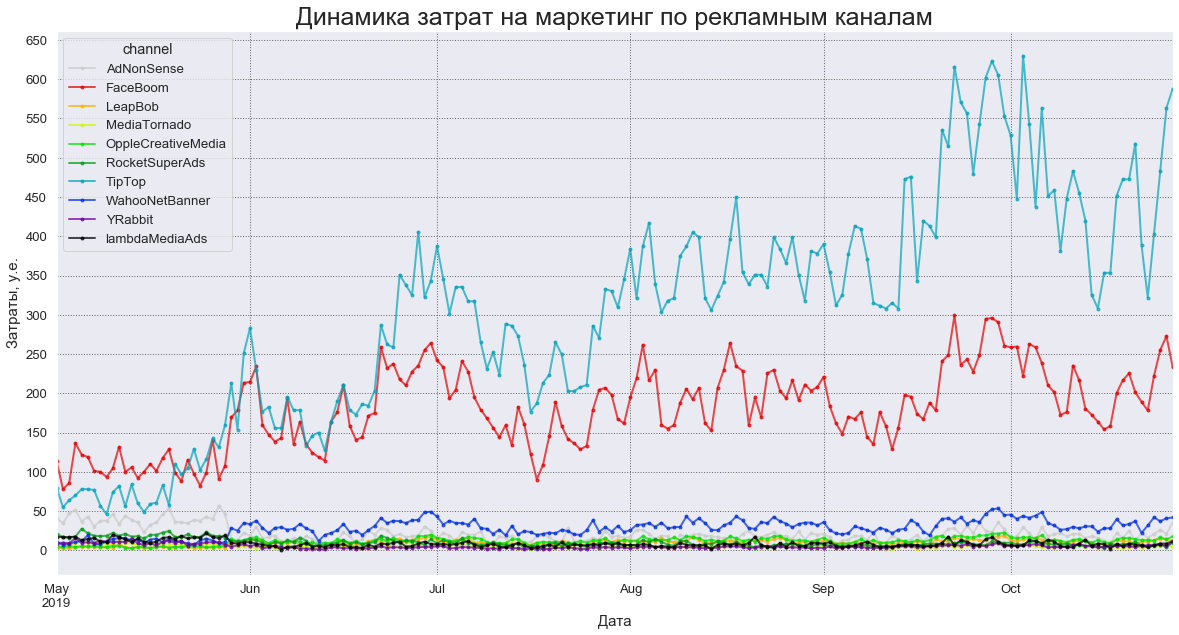

In [61]:
costs_channel.plot(
    figsize=(20, 10),
    grid=True,
    label='channel',
    legend=True,
    colormap='nipy_spectral_r',
    linewidth=2,
    marker='o',
    markersize=3,
    alpha=0.7)

plt.yticks(np.arange(0, 700, 50))
plt.title('Динамика затрат на маркетинг по рекламным каналам', size=25)
plt.xlabel('Дата', size=15)
plt.ylabel('Затраты, у.е.', size=15)

<font size=2>
Отчётливо виден рост затрат по двум каналам - <b>TipTop</b> и <b>Faceboom</b>. В пиковые дни - вторая половина сентября, начало и конец сентября по первому каналу дневные траты превышалт 600 у.е., а по второму достигали 300 у.е. В начале истории наблюдений дневные траты по <b>TipTop</b> были меньше, чем по <b>Faceboom</b>, почти весь июнь между этими каналами практически был паритет по дневным затратам, но начиная с последней декады месяца затраты на <b>TipTop</b> неизменно больше, чем на <b>Faceboom</b>. На фоне двух каналов-лидеров может показаться, что по остальным каналам нет никакой динамики, посмотрим на них отдельно: 

In [62]:
# для лучшей наглядности разделим график и оставим на каждой части по 4 канала
costs_channel_2 = costs[~costs['channel'].isin(
    ['FaceBoom', 'TipTop', 'lambdaMediaAds', 'YRabbit', 'WahooNetBanner', 'RocketSuperAds'])].pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum')

costs_channel_3 = costs[~costs['channel'].isin(
    ['FaceBoom', 'TipTop', 'AdNonSense', 'LeapBob', 'MediaTornado', 'OppleCreativeMedia'])].pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum')

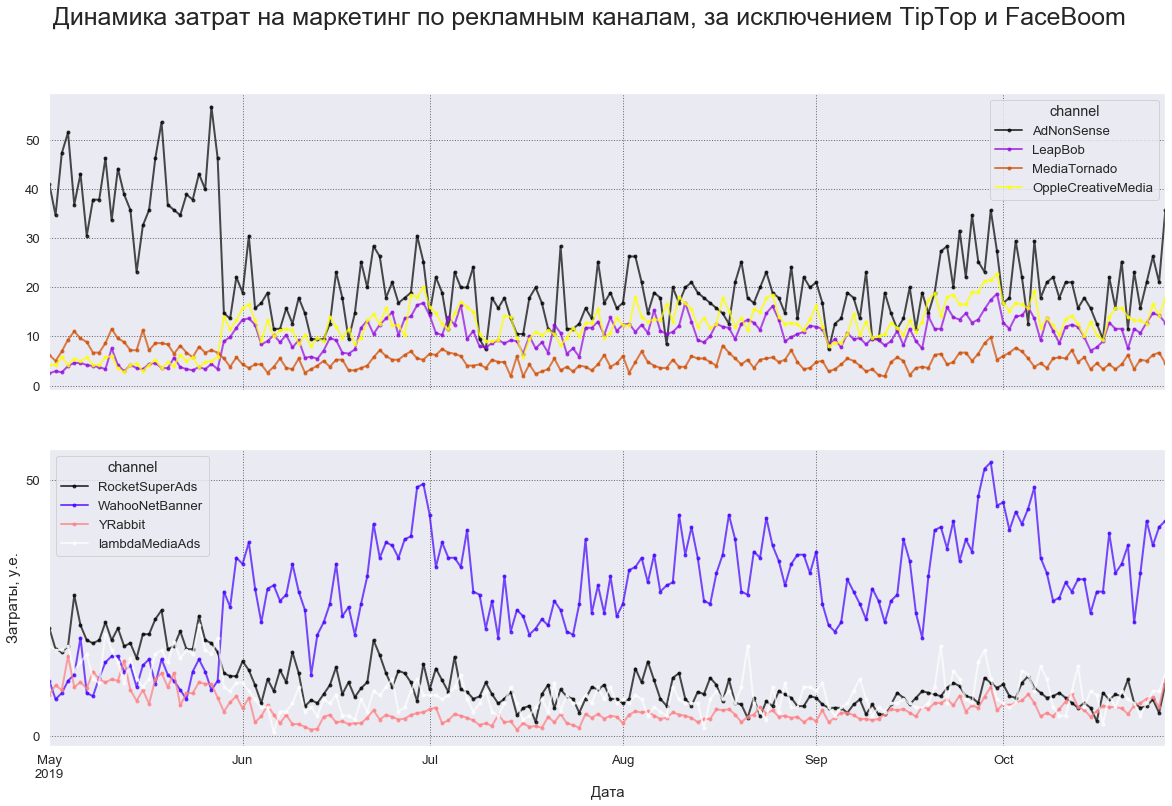

In [63]:
f, ax = plt.subplots(2, 1, sharex=True, figsize=(20, 12))

costs_channel_2.plot(
    grid=True,
    label='channel',
    legend=True,
    colormap='gnuplot',
    linewidth=2,
    marker='o',
    markersize=3,
    alpha=0.7,
    ax=ax[0])

costs_channel_3.plot(
    grid=True,
    label='channel',
    legend=True,
    colormap='gnuplot2',
    linewidth=2,
    marker='o',
    markersize=3,
    alpha=0.7,
    ax=ax[1])

plt.yticks(np.arange(0, 75, 50))
plt.suptitle(
    'Динамика затрат на маркетинг по рекламным каналам, за исключением TipTop и FaceBoom', size=25)
plt.xlabel('Дата', size=15)
plt.ylabel('Затраты, у.е.', size=15)

<font size=2>
По остальным рекламным источникам мы можем отметь рост затрат по <b>WahooNetBanner</b> и просадку с окончанием весны по каналу <b>AdNonSense</b>. По остальным каналам колебания затрат не такие значительные, но и по ним можно заметить тенденцию одних каналов к уменьшению, а других к увеличению затрат с началом лета.

### Средний CAC на одного пользователя для всего проекта

In [64]:
profiles = profiles.query('channel != "organic"')
# profiles.info()

In [65]:
profiles.sample(7, random_state=1)

user_id            first_ts   channel   device         region  \
48344   320345734522 2019-05-12 15:31:36  FaceBoom   iPhone  United States   
37339   247802576178 2019-09-24 11:28:52    TipTop   iPhone  United States   
24994   166721405111 2019-10-04 18:19:38   LeapBob   iPhone        Germany   
116033  773199226768 2019-08-15 14:37:48   LeapBob  Android         France   
80493   534631256082 2019-07-30 15:42:13    TipTop   iPhone  United States   
17466   116086928670 2019-10-18 07:18:20   LeapBob  Android        Germany   
147603  983871327210 2019-10-26 19:39:54  FaceBoom   iPhone  United States   

               dt      month  payer  acquisition_cost  
48344  2019-05-12 2019-05-01  False              1.15  
37339  2019-09-24 2019-09-01  False              3.48  
24994  2019-10-04 2019-10-01  False              0.21  
116033 2019-08-15 2019-08-01  False              0.21  
80493  2019-07-30 2019-07-01  False              2.67  
17466  2019-10-18 2019-10-01  False              0.22  
147603 2019-10-26 2019-10-01  False              1.11

In [66]:
profiles['acquisition_cost'].describe()

count   93,569.00
mean         1.13
std          0.99
min          0.12
25%          0.26
50%          1.08
75%          1.13
max          3.72
Name: acquisition_cost, dtype: float64

<font size=2>
Средняя стоимость привлечения пользователя - 1.13 у.е., при этом медианное значение стоимости 1.08.

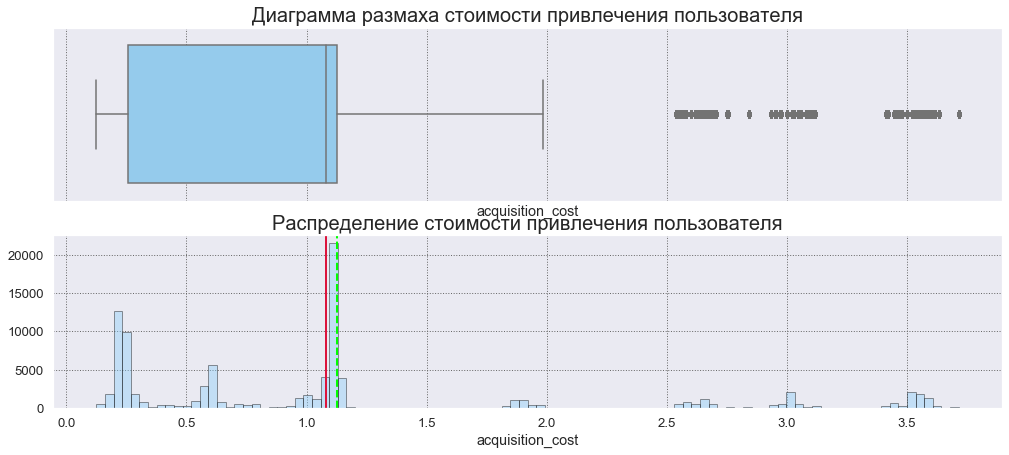

In [67]:
f, ax = plt.subplots(2, 1, sharex=True, figsize=(17, 7))

ax[0].set_title(
    'Диаграмма размаха стоимости привлечения пользователя', size=20)
ax[1].set_title('Распределение стоимости привлечения пользователя', size=20)

sns.boxplot(profiles['acquisition_cost'], color='lightskyblue', ax=ax[0])
sns.distplot(profiles['acquisition_cost'],
             bins=100, color='lightskyblue',
             hist_kws=dict(edgecolor="black", linewidth=1),
             ax=ax[1],
             kde=False)
plt.axvline(x=profiles['acquisition_cost'].mean(),
            linewidth=2,
            color='lime',
            linestyle='--')
plt.axvline(x=profiles['acquisition_cost'].median(),
            linewidth=2,
            color='crimson',
            linestyle='-')

### Средняя стоимость привлечения одного пользователя из каждого источника. 

In [68]:
cac_by_channel = profiles.groupby(['channel'])['acquisition_cost'].mean().reset_index().sort_values(
    'acquisition_cost', ascending=False)
cac_by_channel

channel  acquisition_cost
6              TipTop              2.80
1            FaceBoom              1.11
0          AdNonSense              1.01
9      lambdaMediaAds              0.72
7      WahooNetBanner              0.60
5      RocketSuperAds              0.41
4  OppleCreativeMedia              0.25
8             YRabbit              0.22
3        MediaTornado              0.22
2             LeapBob              0.21

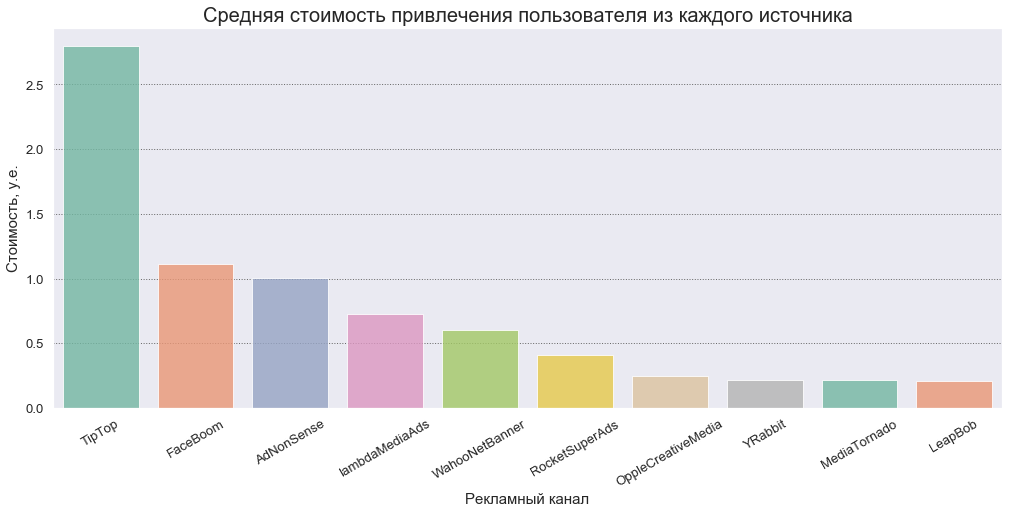

In [69]:
fig, scatter = plt.subplots(figsize=(17, 7))
sns.barplot(x='channel',
            y="acquisition_cost",
            data=cac_by_channel,
            order=cac_by_channel['channel'],
            palette='Set2',
            alpha=.8
            )
plt.title("Средняя стоимость привлечения пользователя из каждого источника", size=20)
plt.xlabel("Рекламный канал", size=15)
plt.ylabel("Стоимость, у.е.",  size=15)
plt.xticks(rotation=30)
plt.show()

<font size=2>
Самая дорогая стоимость привлечения одного клиента у канала <b>TipTop</b> - 2,80 у.е., затем идут <b>FaceBoom</b> - 1,11 у.е., <b>AdNonSense</b> - 1,01 у.е., <b>lambdaMediaAds</b> - 0,72 у.е. и <b>WahooNetBanner</b> - 0,60 у.е. У оставшихся каналов стоимость привлечения клиента колеблется от 0,21 у.е. до 0,41. Органический трафик разумеется бесплатен.

### Промежуточный вывод

<font size=2>
    
- Общие затраты на маркетинг составляют 105,497.30 у.е., при этом половина из них - 52%, приходится на канал <b>TipTop</b>, а треть - 31%, на канал <b>FaceBoom</b>, остальные каналы не такие затратные, на <b>WahooNetBanner</b> приходится 5% затрат, а на <b>AdNonSense</b> 4 %, траты по остальным шести каналам не превышают 2% по каждому.<br/>
- Самая дорогая стоимость привлечения также у <b>TipTop</b> - 2,80 у.е, практически одинаковая стредняя стоимость привлечения у каналов <b>FaceBoom</b> и <b>AdNonSense</b> - 1,11 и 1,01 у.е. соответственно. У остальных рекламных каналов стоимость привлечения ниже, а в среднем один клиент обходится в 0,7 у.е.<br/>
-По двум самым дорогим каналам заметен рост затрат, снижение затрат показывает только канал <b>AdNonSense</b>. По остальным же канал существенной динамики не заметно.

## Окупаемость рекламы для привлечения пользователей

### Общая окупаемость рекламы

<b><i><font size=1>на календаре 1 ноября 2019 года, в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно

Исключаем органических пользователей, чтобы не исказить результаты, стоимость их привлечения нулевая.

In [88]:
prof_usa_tiptop = profiles.query('channel == "TipTop"')
prof_usa_tiptop = prof_usa_tiptop.query('region == "United States"')
prof_usa_tiptop

user_id            first_ts channel   device         region  \
19         112595447 2019-08-04 06:39:43  TipTop   iPhone  United States   
30         193699987 2019-06-23 07:46:23  TipTop  Android  United States   
61         374052872 2019-08-08 15:42:57  TipTop      Mac  United States   
71         414791703 2019-05-03 12:01:28  TipTop   iPhone  United States   
72         421897585 2019-09-05 13:47:08  TipTop   iPhone  United States   
...              ...                 ...     ...      ...            ...   
149995  999916536269 2019-06-09 12:27:24  TipTop   iPhone  United States   
149997  999926806280 2019-10-19 14:27:48  TipTop   iPhone  United States   
149999  999942424543 2019-05-24 21:03:26  TipTop   iPhone  United States   
150003  999956196527 2019-09-28 08:33:02  TipTop   iPhone  United States   
150005  999976332130 2019-07-23 02:57:06  TipTop   iPhone  United States   

               dt      month  payer  acquisition_cost  
19     2019-08-04 2019-08-01  False              3.00  
30     2019-06-23 2019-06-01  False              1.96  
61     2019-08-08 2019-08-01   True              2.97  
71     2019-05-03 2019-05-01   True              1.05  
72     2019-09-05 2019-09-01  False              3.50  
...           ...        ...    ...               ...  
149995 2019-06-09 2019-06-01  False              1.88  
149997 2019-10-19 2019-10-01  False              3.61  
149999 2019-05-24 2019-05-01  False              1.90  
150003 2019-09-28 2019-09-01  False              3.50  
150005 2019-07-23 2019-07-01  False              2.60  

[19561 rows x 9 columns]

In [91]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof_usa_tiptop, orders, observation_date, horizon_days)

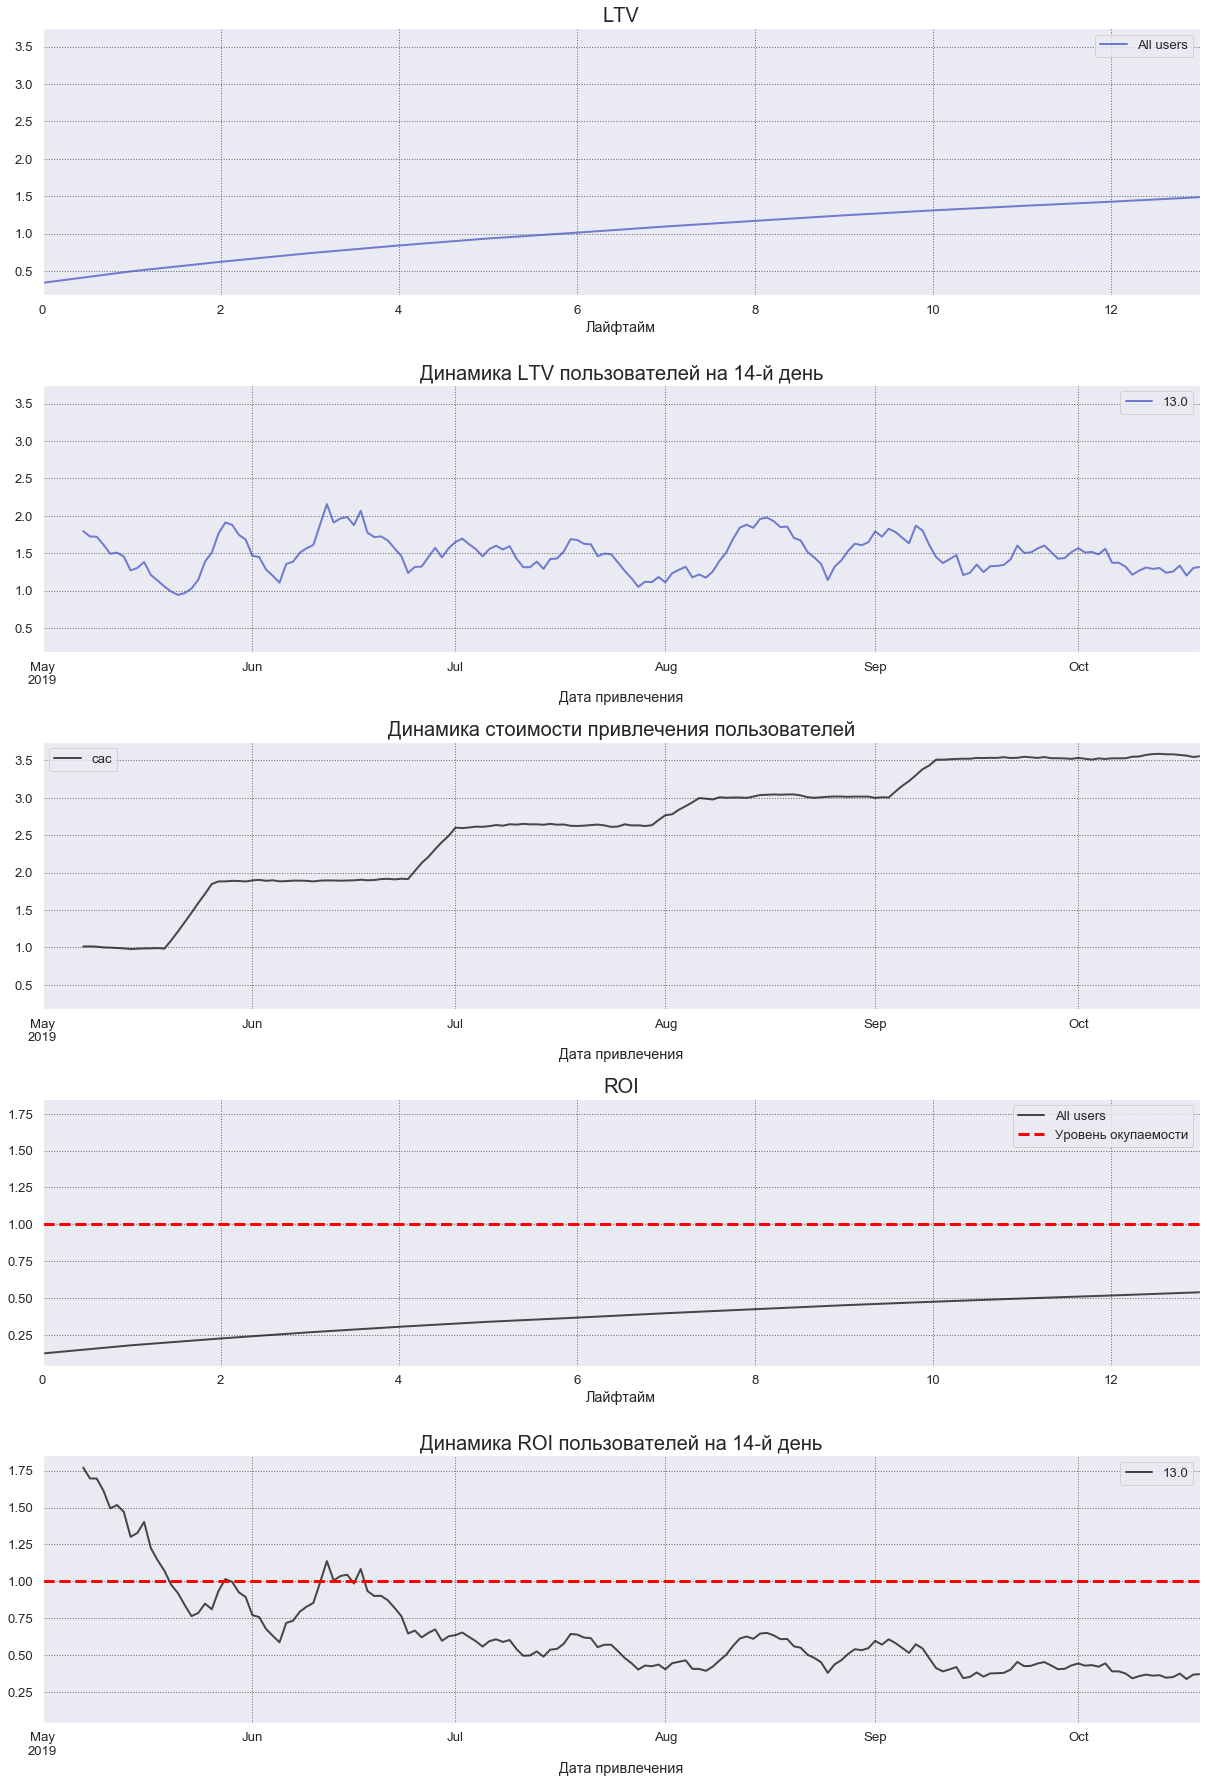

In [92]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

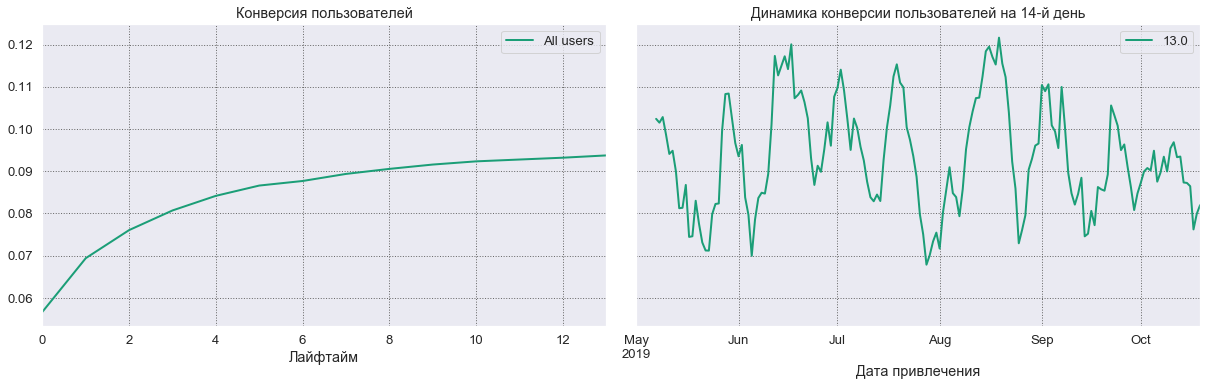

In [94]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    prof_usa_tiptop, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

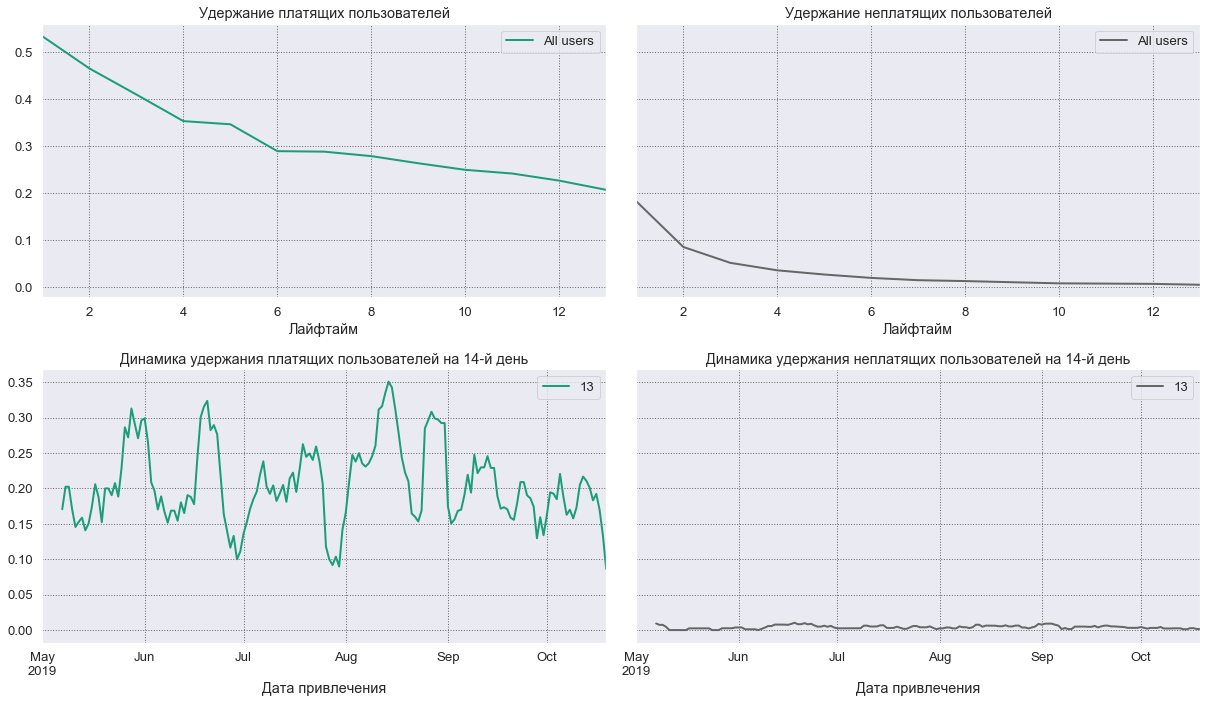

In [95]:
retention_raw, retention_grouped, retention_history = get_retention(
    prof_usa_tiptop, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)

In [71]:
profiles = profiles.query('channel != "organic"')

In [72]:
profiles

user_id            first_ts       channel   device  \
0             599326 2019-05-07 20:58:57      FaceBoom      Mac   
1            4919697 2019-07-09 12:46:07      FaceBoom   iPhone   
3           22593348 2019-08-22 21:35:48    AdNonSense       PC   
4           31989216 2019-10-02 00:07:44       YRabbit   iPhone   
7           46006712 2019-06-30 03:46:29    AdNonSense  Android   
...              ...                 ...           ...      ...   
149999  999942424543 2019-05-24 21:03:26        TipTop   iPhone   
150001  999949280903 2019-08-12 06:47:27      FaceBoom      Mac   
150003  999956196527 2019-09-28 08:33:02        TipTop   iPhone   
150005  999976332130 2019-07-23 02:57:06        TipTop   iPhone   
150006  999979924135 2019-09-28 21:28:09  MediaTornado       PC   

               region         dt      month  payer  acquisition_cost  
0       United States 2019-05-07 2019-05-01   True              1.09  
1       United States 2019-07-09 2019-07-01  False              1.11  
3             Germany 2019-08-22 2019-08-01  False              0.99  
4       United States 2019-10-02 2019-10-01  False              0.23  
7              France 2019-06-30 2019-06-01   True              1.01  
...               ...        ...        ...    ...               ...  
149999  United States 2019-05-24 2019-05-01  False              1.90  
150001  United States 2019-08-12 2019-08-01  False              1.12  
150003  United States 2019-09-28 2019-09-01  False              3.50  
150005  United States 2019-07-23 2019-07-01  False              2.60  
150006  United States 2019-09-28 2019-09-01  False              0.21  

[93569 rows x 9 columns]

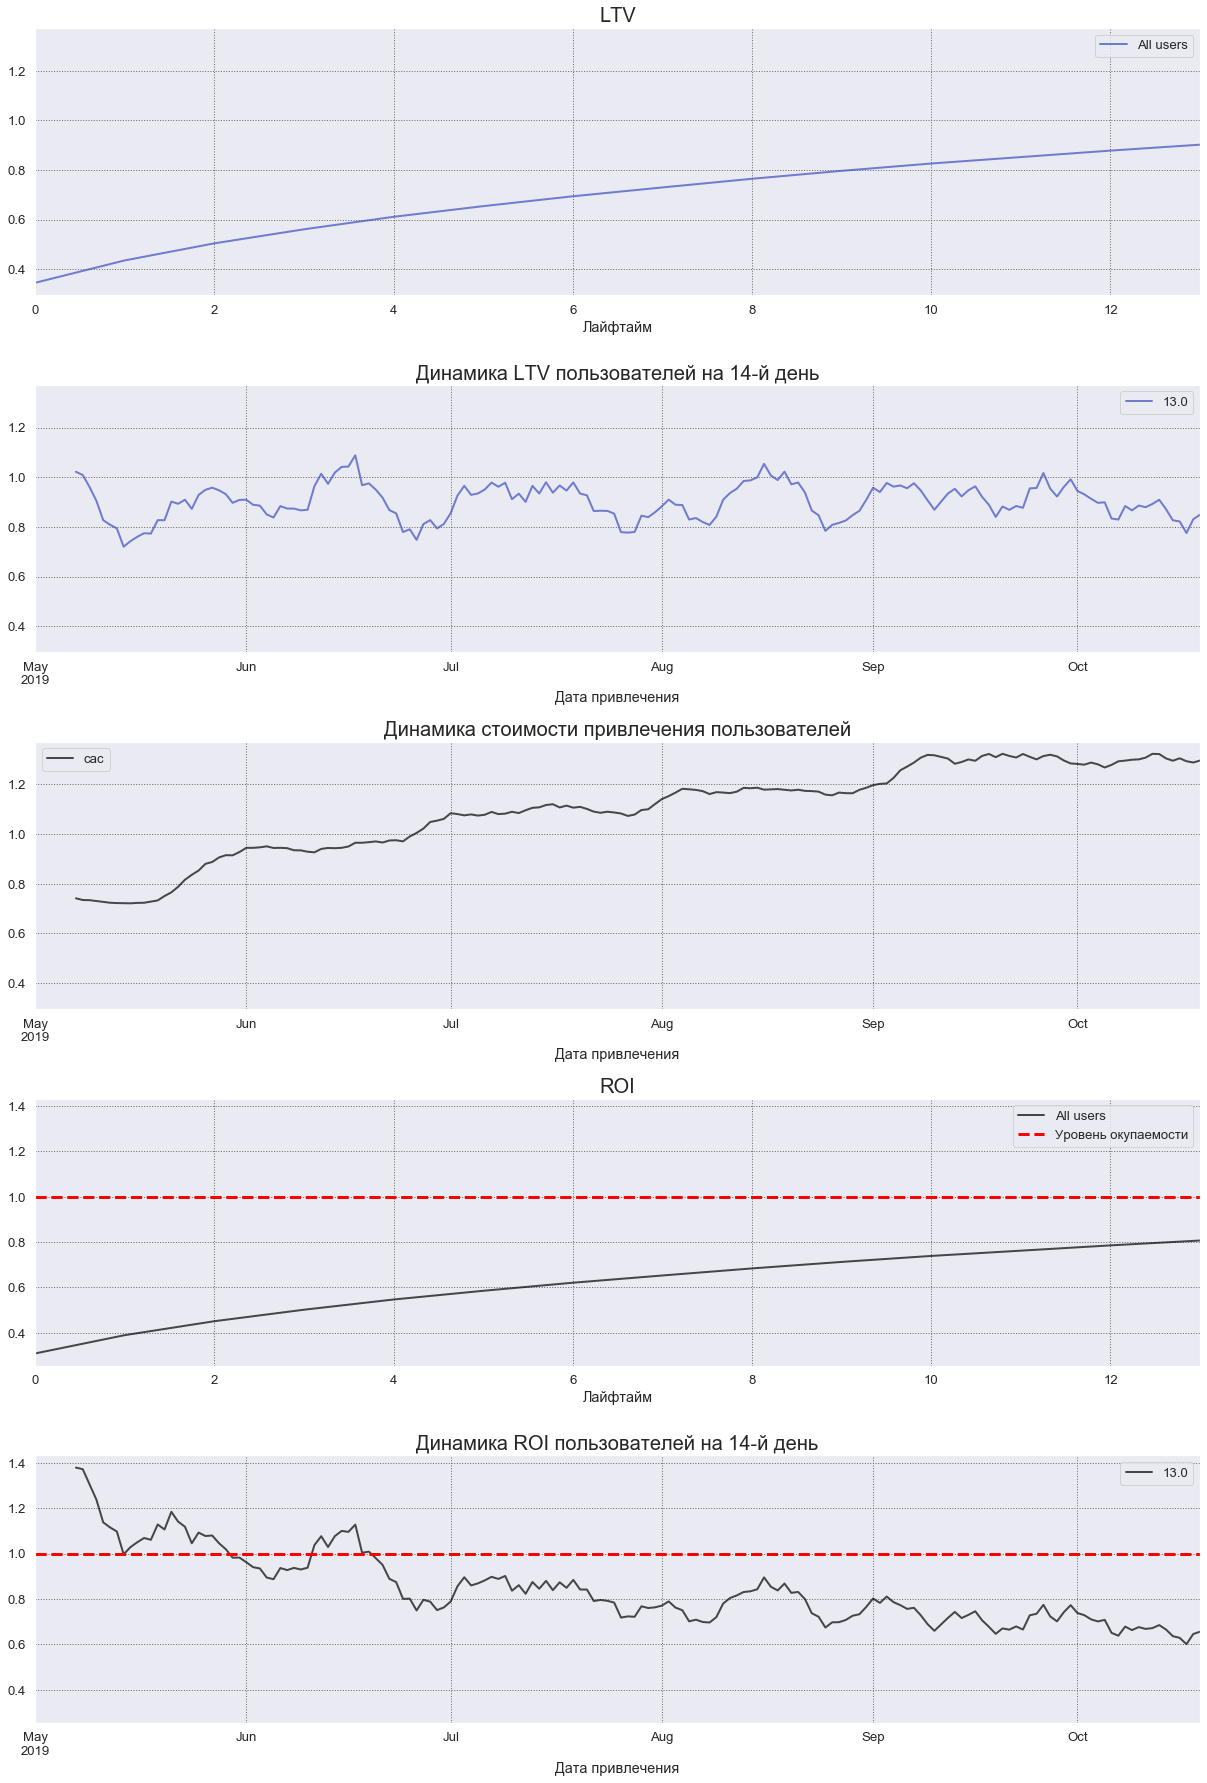

In [73]:
# момент анализа
observation_date = datetime(2019, 11, 1).date()
# горизонт анализа
horizon_days = 14

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<font size=2>
    По общим графикам можно сделать следующие выводы:
    
- Реклама не окупается, к концу двухнедельного периода ROI немногим более 80%. ROI пользователей падает, если до первой половины июня мы ещё наблюдаем значения выше уровня окупаемости, но вот для пользователей со второй половины месяца идёт значительное падение ниже уровня окупаемости.
- Стоимость привлечения одного клиента нестабильна и с течением времени увеличивается почти в два раза.
- LTV в целом достаточно стабилен, сильных сезонных колебаний незаметно.<br/>
    Посмотрим на показатели в зависимости от пользовательских характеристик.

### Окупаемость с разбивкой по устройствам

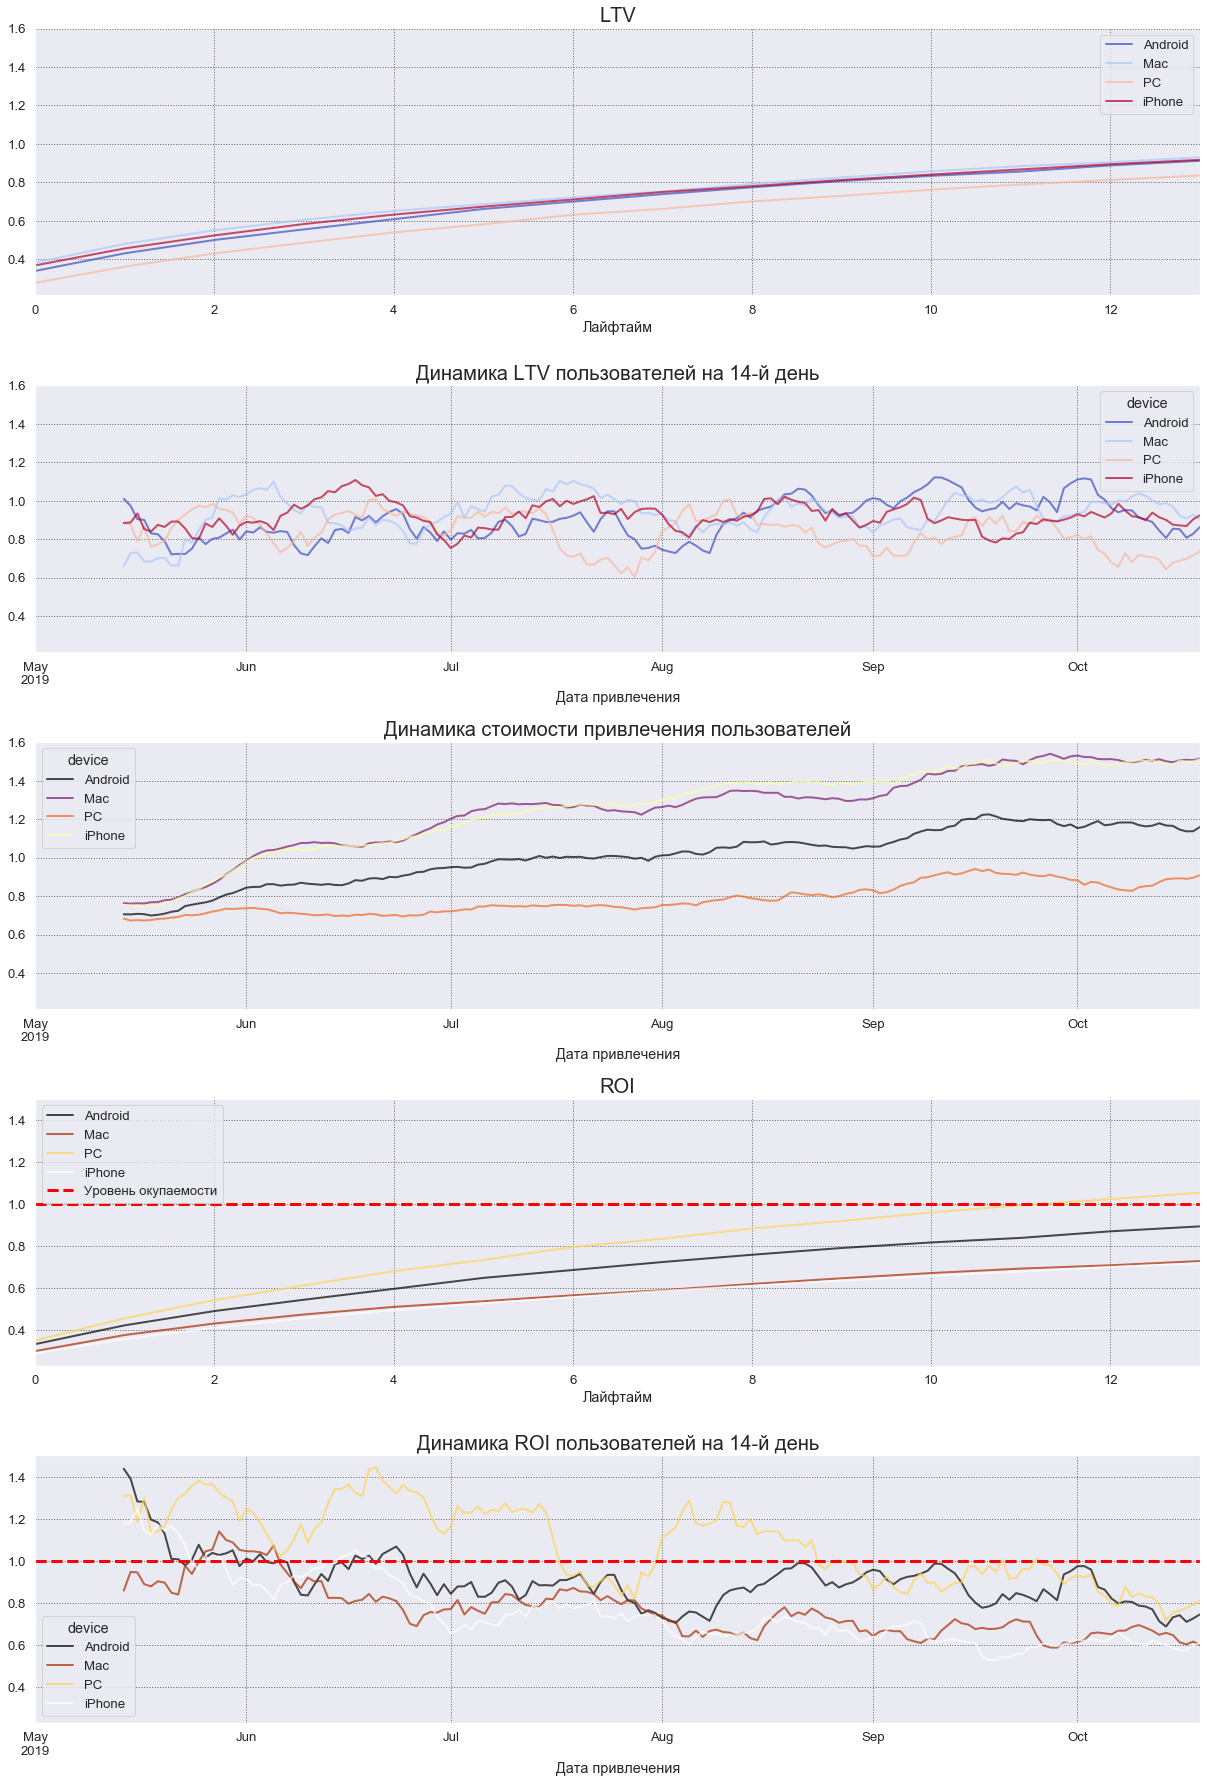

In [74]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<font size=2>
    В разрезе устройств окупаемость страдает у всех категорий, особенно у пользователей Mac и iPhone, падение ROI пользователей ниже уровня окупаемости началось ещё в мае, ROI PC-пользователей самый хороший из представленных, но и он падает ниже уровня окупаемости, сначала во второй половине июля, а затем окончательно опускается ниже "красной линии" в конце августа. LTV всех категорий пользователей в целом относительно стабилен. 

### Окупаемость с разбивкой по рекламным каналам

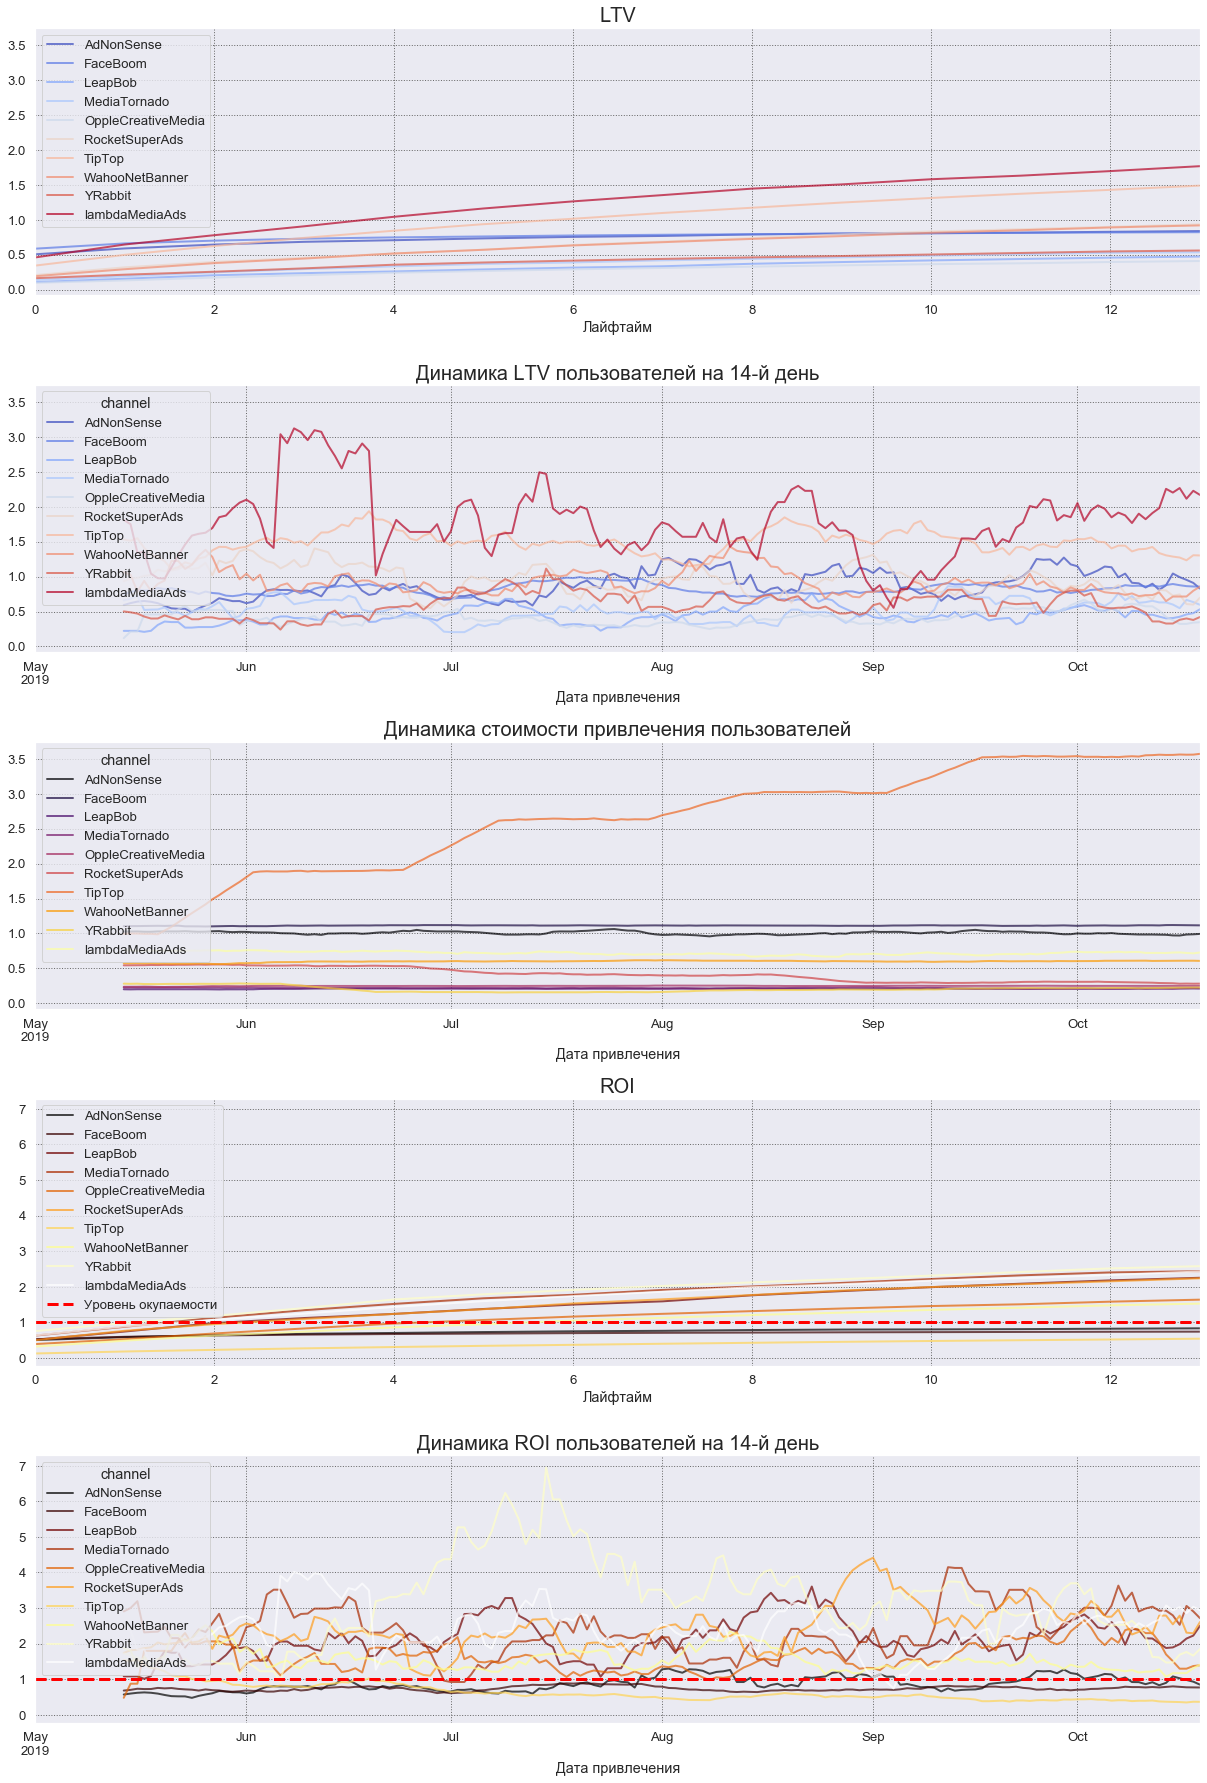

In [75]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<font size=2>
    В разрезе рекламных каналов заметно, что сильно выделяется стоимость привлечения по каналу <b>TipTop</b>, которая из месяца в месяц значительно растёт, при значениях ROI пользователей ниже уровня окупаемости. Хорошие результаты показал канал <b>YRabbit</b>, ROI пользователей в июле был очень высок.<br/>
    Не окупаются также пользователи из каналов <b>LeapBop</b> и <b>FaceBoom</b>.<br/>
    LTV стабилен, сильные колебания можно заметить только по каналу <b>lambdaMediaAds</b>.

### Окупаемость рекламы с разбивкой по странам

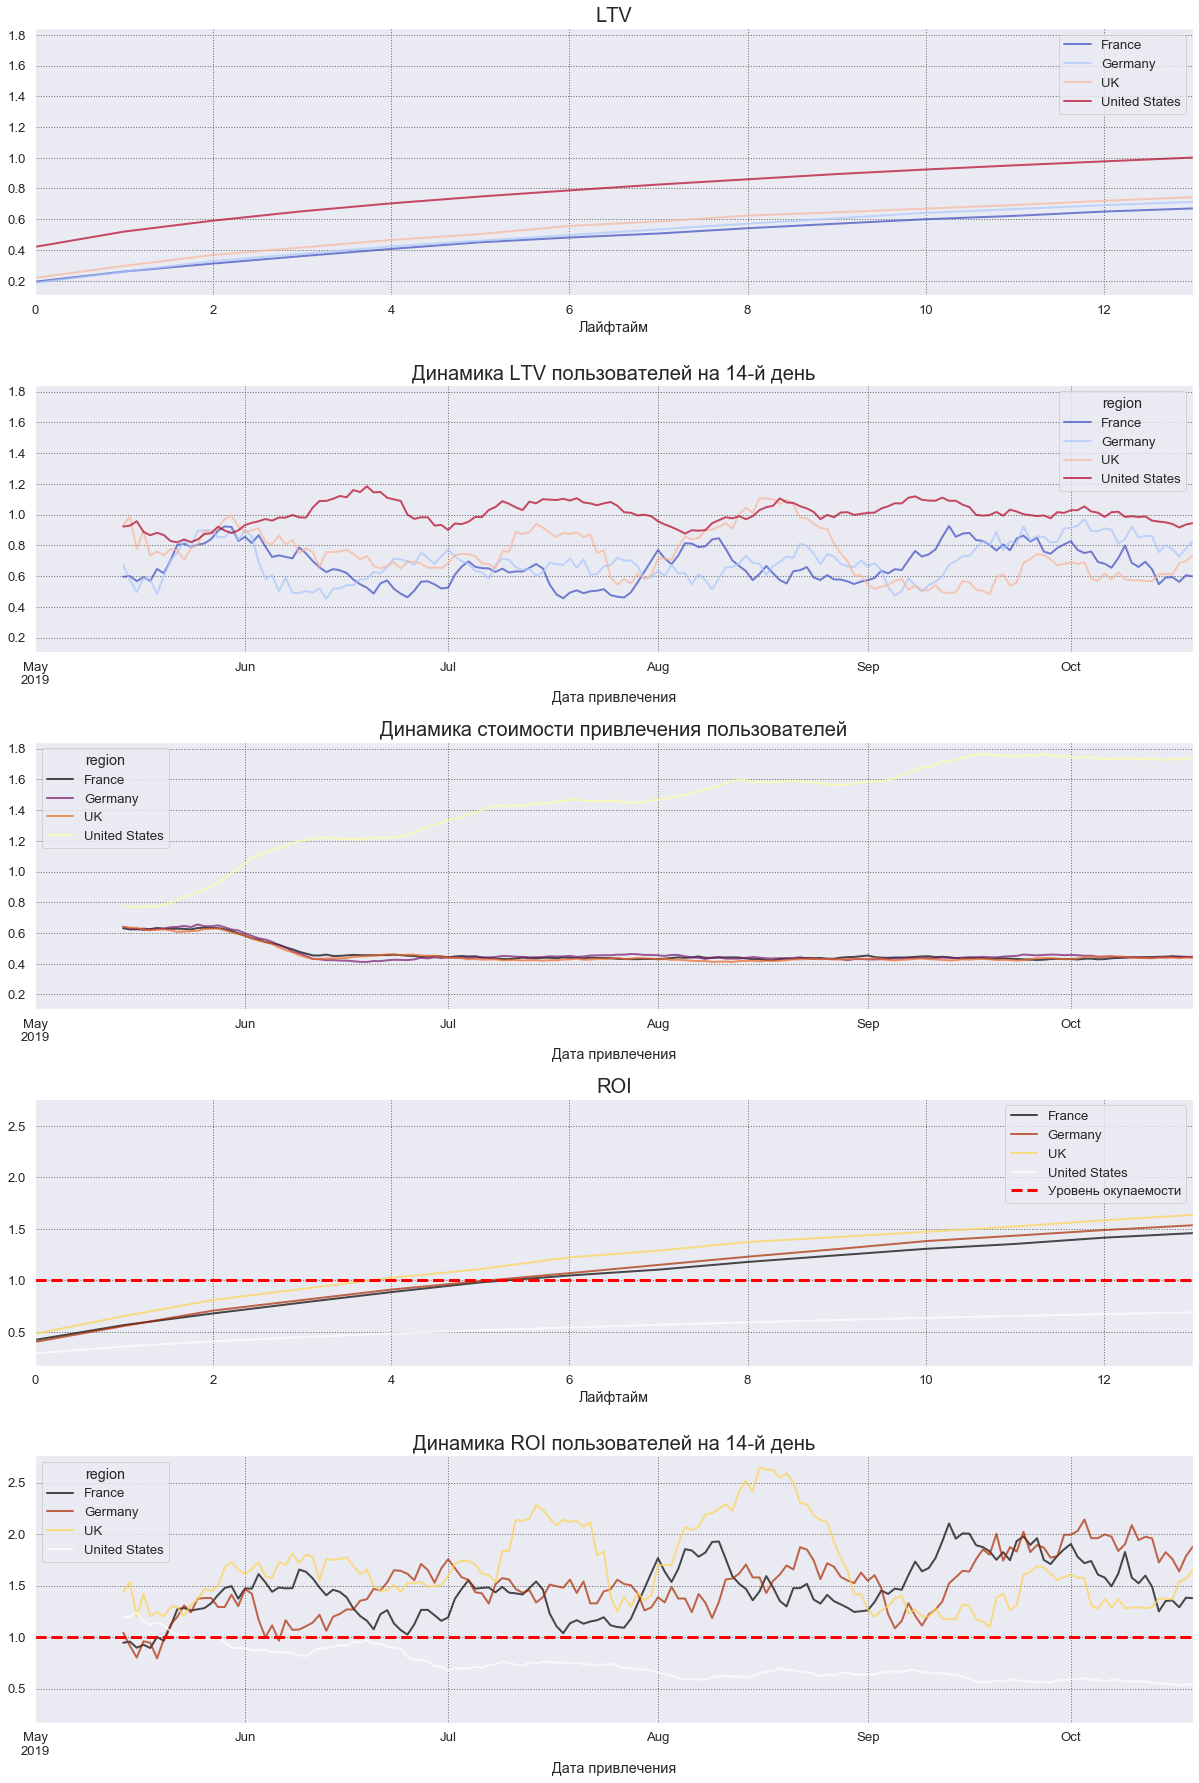

In [76]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<font size=2>
    Реклама окупается не везде. В США стоимость привлечения клиентов самая высокая и помимо этого она постоянно растёт, в отличие от стоимости привлечения во Франции, Германии и Великобритании. LTV в целом по всем представленным регионам стабилен. Самые высокие значения ROI пользователей показывают клиенты из Великобритании, но в целом у всех, за исключением США уровень окупаемости одинаков. ROI же для пользователей из США падает ниже уровня окупаемости ещё в мае, в июне немного пытаясь подняться выше "красной линии", но с июля продолжает падение.<br/>

### Графики конверсии и удержания

#### общая конверсия и удержание

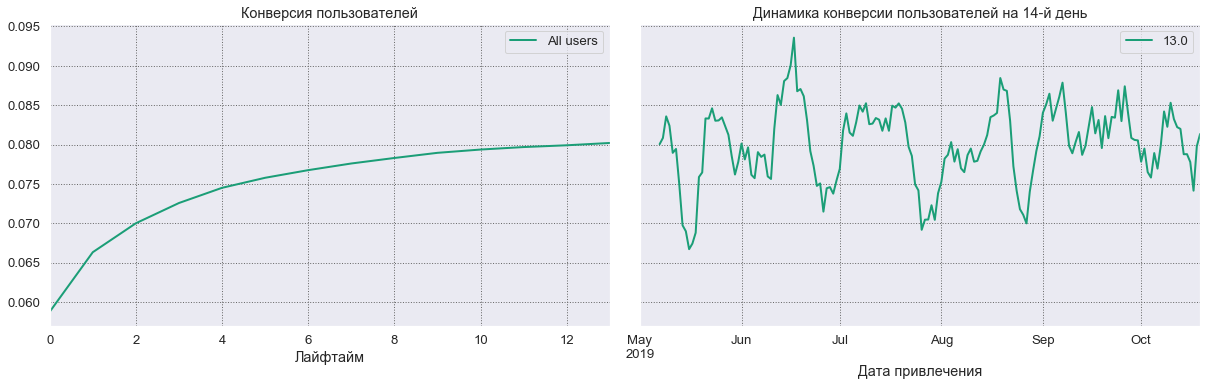

In [77]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

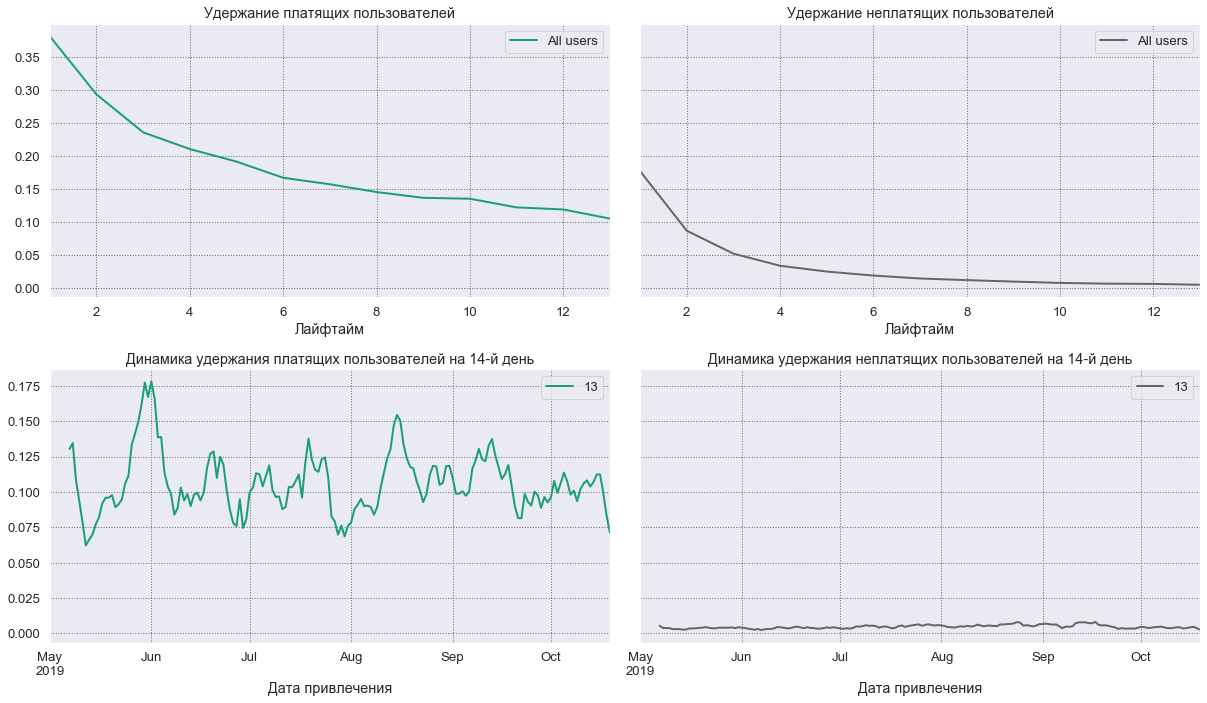

In [78]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)

<font size=2>
    Удерживаются и динамика платящих пользоватлей лучше чем неплатящие, тут без неожиданностей. Посмотрим как эти показатели в зависят от характеристик пользователей.

#### с разбивкой по устройствам

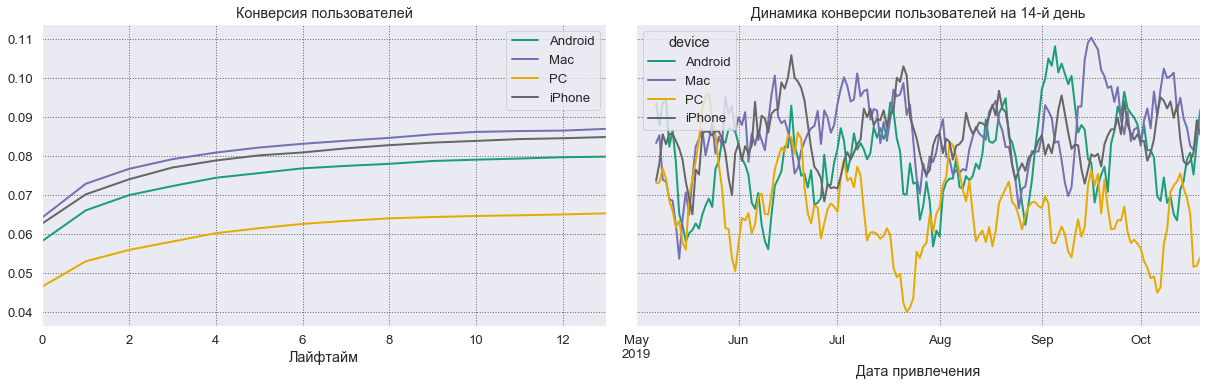

In [79]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

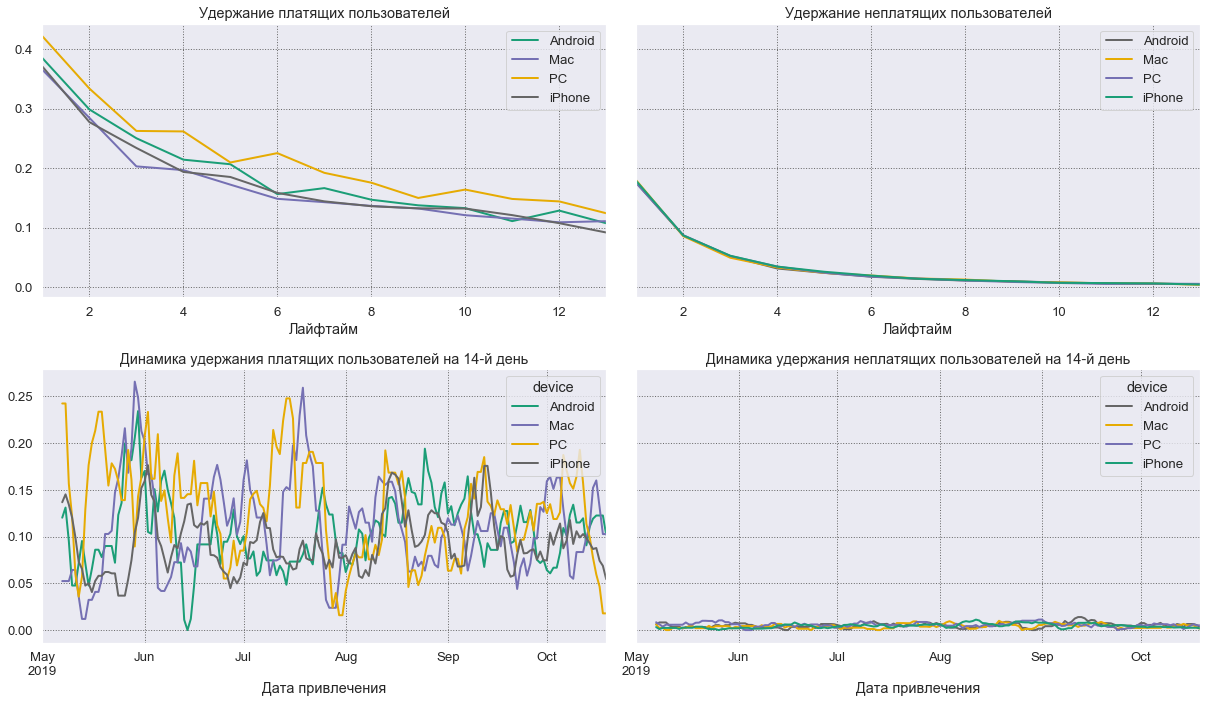

In [80]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

<font size=2>
   Конверсия отстаёт у пользователей PC, у пользователей пользователей остальных платформ она в целом хорошая и не проседает в динамике. А вот удержание наоборот у пользователей PC немного выше, чем у остальных. Но выделить пользователей каких-либо устройств с плохим удержанием мы не можем.

#### с разбивкой по странам

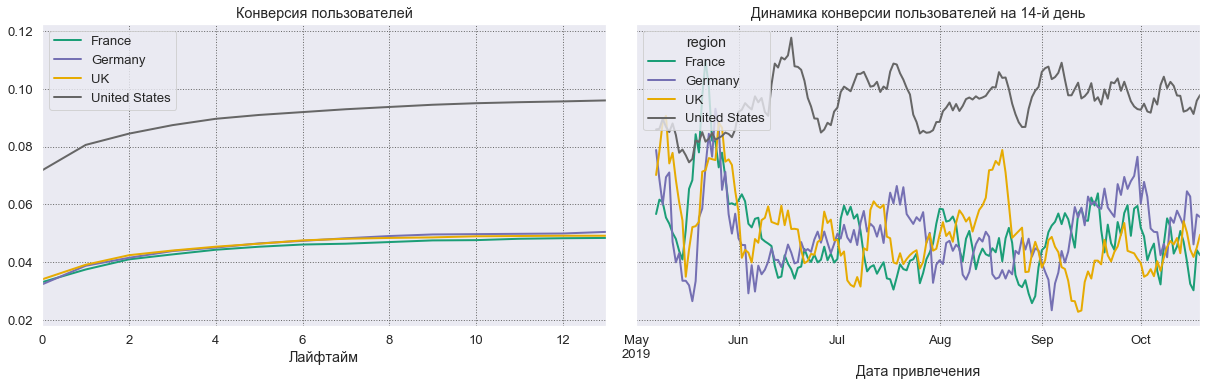

In [81]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

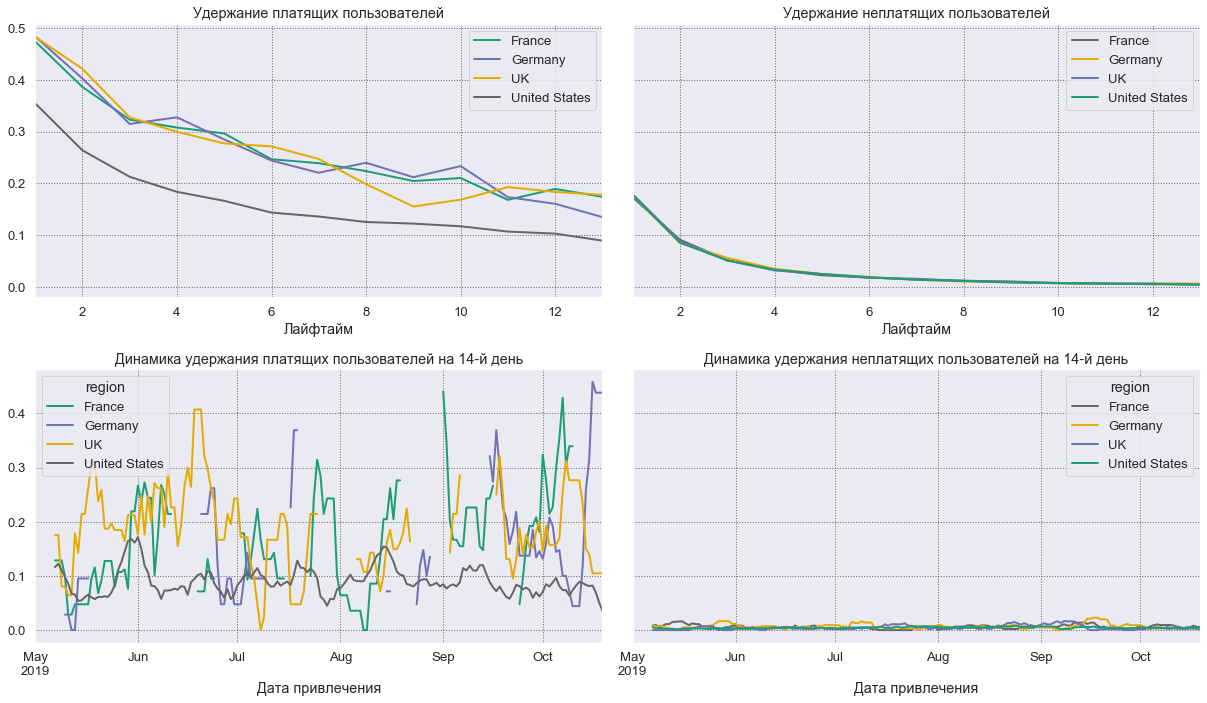

In [82]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

<font size=2>
    Высокая конверсия у пользователей из США, у пользователей из остальных стран она значительно ниже, но стоит помнить пользователей из США у нас 2/3 от общего числа. Удержание же пользователей из США, наоборот, ниже всех.

#### с разбивкой по рекламным каналам

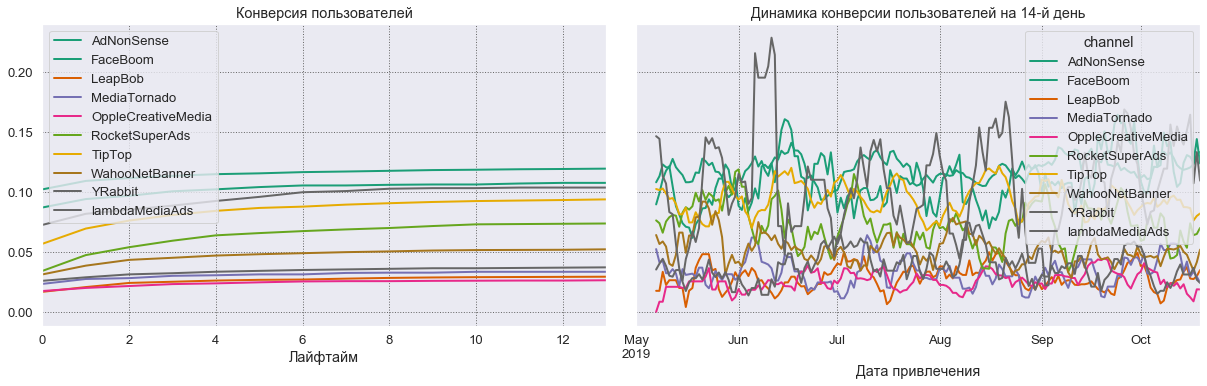

In [83]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

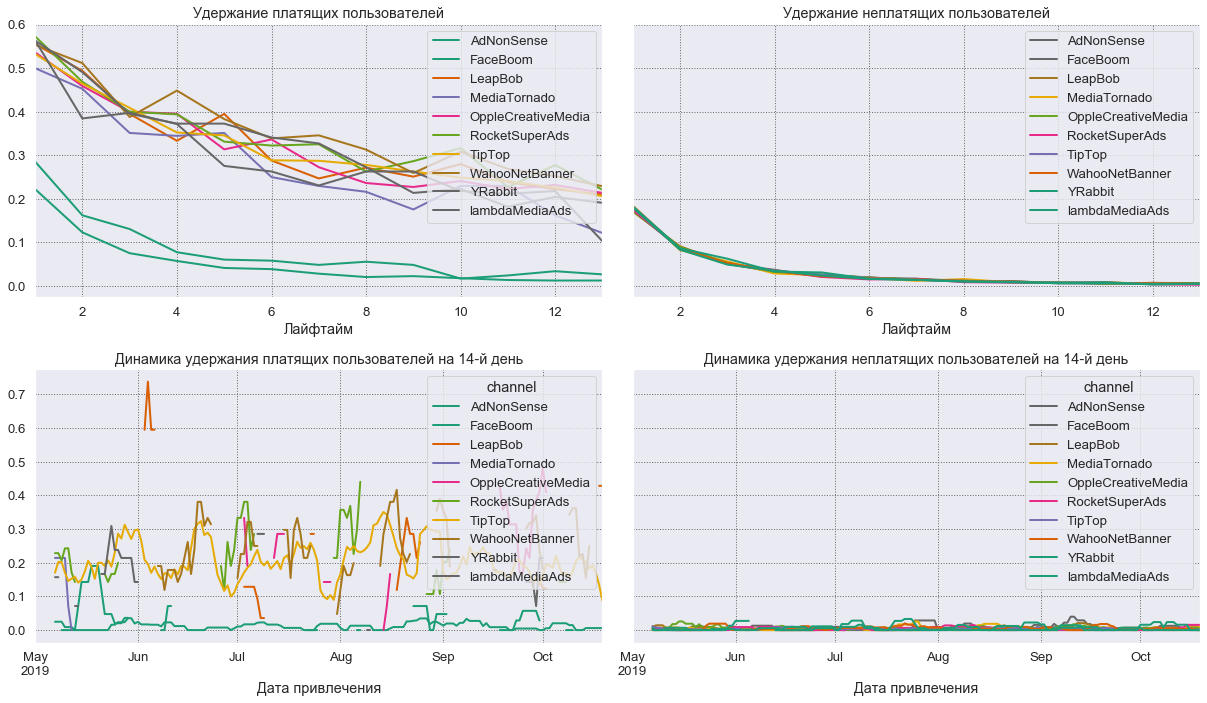

In [84]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

<font size=2>
    Высокая конверсия у каналов <b>AdNonSense</b>, <b>FaceBoom</b> и <b>lambdaMediaAds</b>, хуже всех конвертируются <b>LeapBob</b> и <b>OppleCreativeMedia</b>. По удержанию хуже всего себя показывают каналы <b>AdNonSense</b> и <b>FaceBoom</b>. 

## Выводы

<font size=2>
В ходе анализа логов приложения Procrastinate Pro+ мы выяснили, что аудитория приложения представлена пользователями из 4-х странам: США, Великобритания, Франция и Германия, устройства, которыми они пользуются, поделены на 4 категории: iPhone, Android, PC и Mac. Наибольшее число пользователей из США - 100002 чел.(67%) и пользователей мобильных устройств - Iphone 54479 чел.(36%) и Android - 35032 чел. (23%). Смело можно считать основной аудиторий приложения эти категории пользователей, не забывая, разумеется и об пользователях из других стран и предпочитающих пользоваться приложением с компьютера, на них всё же приходится треть и четверть, соответственно от общего числа пользователей.<br/>
    
Источниками привлечения пользователей являются 10 каналов, самые популярные из них <b>FaceBoom</b> - и <b>TipTop</b>, через которые в приложение пришло 29144 чел.(19%) и 19561 чел.(13%) соответственно. Также можно отметить высокий процент "органических" пользователей - 38%.<br/>
Общие затраты на маркетинг составили 105497,30 у.е., основными здесь оказались затраты на два уже названных выше рекламных источника - <b>FaceBoom</b>, на который потрачено 32445.6 у.е.(31%) и <b>TipTop</b>, на который ушло больше половины всех средств - 52% или 54751.3 у.е.<br/>
    
Реклама к концу второй недели не окупается, ROI падает, если до середины июня он ещё был выше уровня окупаемости, то в дальнейшем продолжил падение, в конце истории наблюдений оего значение составляет 0,6. Для определения причин неэффективности был проведён анализ по известным зхарактеристикам пользователей - устройству, стране и каналу привлечения. Хуже всего здесь показали пользователи всех категорий устройств, значения ROI падает, даже у пользователей PC, хотя в начале он был довольно высок. Так же довольно высока стоимость привлечения пользователей iPhone и Mac.<br/>
В разрезе стран особняком стоят пользователи из США, с остальными странами огромная разница, как и по стоимости привлечения клиента, так и по динамике ROI и конверсии платящих пользователей.<br/>
По рекламным каналам особенно выделяется <b>TipTop</b>, на который было потрачено больше всего стредств и тенденция к дальнейшему росту никак не может считаться хорошим показателем, с учетом того, что конверсия и удержание у этого канала держится на уровне остальных каналов, на которые было потрачено значительно меньше средств.

<b><u>Причины неэффективности привлечения пользователей.</u></b><br/>

Причинами неэффективности привлечения, исходя из анализа имеющихся данных, могут быть какие-либо проблемы с приложением - неудачное обновление версии приложения, либо какие-то другие проблемы технического характера, всё же по трём из 4-х категорий устройств мы наблюдаем характерное падение ROI к лету, более точно подтвердить или опровергнуть версию технических проблем нам помогли бы другие Логи, но, к сожалению, набор исзодных данных ограничен. Возможно какой-то маленький баг или неудачное дизайнерское решение временами делает приложение менее дружелюбным для пользователя, но не настолько, чтобы совсем перестать им пользоваться, но в длинной перспективе желания пользоваться приложением возникает всё меньше. Но, к сожалению, не имея под рукой других логов, однозначно утверждать, что проблема только технического характера мы не можем. Также возможно, что у приложения уже появились конкуретны и не упустили возможность "откусить" часть пользователей.<br/>
Львиная доля средств была потрачена на канал <b>TipTop</b>, но "КПД" этого канала довольно низок, он явно привлекает нецелевую аудиторию приложения. Опять ж, будь у нас больший набор исходных данных, мы могли бы посмотреть на пользователей в разрезе других типичных характеристик - пол, возраст, уровень дохода, etc.
По странам же хуже всех показатели у пользователией из США, возможно это как-то связано и с техническими проблемами самого приложения и с не совсем корректной работой рекламных каналов, который привлекают нецелевую аудиторию.
    

<b><u>Рекомендации для отдела маркетинга для повышения эффективности.</u></b>

В первую очередь следует обратить внимание на самую многочисленную категорию пользователей - клиентов из США, а также самый затратный рекламный канал - <b>TipTop</b>. Причём возможно, что стоит рассмотреть эти два параметра не только по отдельности, но и вместе.<br/>
Также возможно стоит распределить бюджет между рекламными каналами более равномерно, чтобы определить более эффективные каналы и в дальнейшем уже сконцентрироваться на них. Сейчас из-за значительного перекоса затрат на один канал нельзя достоверно утверждать, что остальные каналы однозначно убыточны.<br/>
Для пользователей из США возможно стоит устроить какую-нибудь акцию или предложение, как и для пользователей мобильной версии приложения, акцент на десктопных версиях я бы делать не стал сейчас, всё же сейчас модель потребления контента меняется, в большинстве своём сейчас если приложение не какое-то направленное и узкоспециализированное (САПР например), то целовек скорее всего пользуется его (приложения) мобильной версией.<br/>
С учётом того, что пользователи остальных трёх стран показывают хорошую окупаемость не стоит забывать и про них. Возможно стоит сместить акцент с пользователей США на них и точно также сделать какое-то предложение и для них. Понятно, что в США и населения больше, и % клиентов оттуда больше, но выровнять проценты по разным рынкам было бы неплохо - "держать яйца в одной корзине" не всегда хорошо.